<a href="https://colab.research.google.com/github/ThamaraCrispim/python-data-analysis-portfolio/blob/main/Northwind.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Perguntas da Análise

Durante esta análise em Python, busca-se responder às seguintes perguntas:

1. Quais padrões e tendências podem ser observados no volume de pedidos e nos valores de frete ao longo do tempo?
2. Existem diferenças relevantes no comportamento dos pedidos e nos custos de frete entre os países atendidos pela empresa?
3. Há presença de valores atípicos (outliers) nos valores de frete, e qual o impacto desses registros nas análises gerais?



In [ ]:
!pip install -q pandas


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

## **Entendimento, Limpeza e Tratamento dos Dados**


In [ ]:
#leitura do dados
df = pd.read_csv('/content/drive/MyDrive/analise de dados/northwind_orders.csv')

In [ ]:
df.shape

(830, 14)

In [ ]:
display(df)

,order_id,customer_id,employee_id,order_date,required_date,shipped_date,ship_via,freight,ship_name,ship_address,ship_city,ship_region,ship_postal_code,ship_country
0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,France
1,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,NaN,44087,Germany
2,10250,HANAR,4,1996-07-08,1996-08-05,1996-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil
3,10251,VICTE,3,1996-07-08,1996-08-05,1996-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,NaN,69004,France
4,10252,SUPRD,4,1996-07-09,1996-08-06,1996-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,NaN,B-6000,Belgium
5,10253,HANAR,3,1996-07-10,1996-07-24,1996-07-16,2,58.17,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil
6,10254,CHOPS,5,1996-07-11,1996-08-08,1996-07-23,2,22.98,Chop-suey Chinese,Hauptstr. 31,Bern,NaN,3012,Switzerland
7,10255,RICSU,9,1996-07-12,1996-08-09,1996-07-15,3,148.33,Richter Supermarkt,Starenweg 5,Genève,NaN,1204,Switzerland
8,10256,WELLI,3,1996-07-15,1996-08-12,1996-07-17,2,13.97,Wellington Importadora,"Rua do Mercado, 12",Resende,SP,08737-363,Brazil
9,10257,HILAA,4,1996-07-16,1996-08-13,1996-07-22,3,81.91,HILARION-Abastos,Carrera 22 con Ave. Carlos Soublette #8-35,San Cristóbal,Táchira,5022,Venezuela


In [ ]:
pd.set_option('display.max_columns', None) #Todas as coluna
pd.set_option('display.max_rows', None) #todas as linhas

In [ ]:
df.head() #5 primeiras linha do código

,order_id,customer_id,employee_id,order_date,required_date,shipped_date,ship_via,freight,ship_name,ship_address,ship_city,ship_region,ship_postal_code,ship_country
0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,France
1,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,NaN,44087,Germany
2,10250,HANAR,4,1996-07-08,1996-08-05,1996-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil
3,10251,VICTE,3,1996-07-08,1996-08-05,1996-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,NaN,69004,France
4,10252,SUPRD,4,1996-07-09,1996-08-06,1996-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,NaN,B-6000,Belgium


In [ ]:
df.tail() #5 ultimas linha do código

,order_id,customer_id,employee_id,order_date,required_date,shipped_date,ship_via,freight,ship_name,ship_address,ship_city,ship_region,ship_postal_code,ship_country
825,11073,PERIC,2,1998-05-05,1998-06-02,NaN,2,24.95,Pericles Comidas clásicas,Calle Dr. Jorge Cash 321,México D.F.,NaN,05033,Mexico
826,11074,SIMOB,7,1998-05-06,1998-06-03,NaN,2,18.44,Simons bistro,Vinbæltet 34,Kobenhavn,NaN,1734,Denmark
827,11075,RICSU,8,1998-05-06,1998-06-03,NaN,2,6.19,Richter Supermarkt,Starenweg 5,Genève,NaN,1204,Switzerland
828,11076,BONAP,4,1998-05-06,1998-06-03,NaN,2,38.28,Bon app',"12, rue des Bouchers",Marseille,NaN,13008,France
829,11077,RATTC,1,1998-05-06,1998-06-03,NaN,2,8.53,Rattlesnake Canyon Grocery,2817 Milton Dr.,Albuquerque,NM,87110,USA


Análise Inicial:
O conjunto de dados Northwind contém 830 registros (linhas) e 14 variáveis (colunas).
Cada registro corresponde a um pedido de venda, trazendo informações sobre o cliente, o funcionário responsável, datas importantes do pedido, forma de envio, valor do frete e dados de localização.
Essa estrutura permite análises relacionadas a volume de pedidos, logística, desempenho de funcionários e distribuição geográfica das vendas.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          830 non-null    int64  
 1   customer_id       830 non-null    object 
 2   employee_id       830 non-null    int64  
 3   order_date        830 non-null    object 
 4   required_date     830 non-null    object 
 5   shipped_date      809 non-null    object 
 6   ship_via          830 non-null    int64  
 7   freight           830 non-null    float64
 8   ship_name         830 non-null    object 
 9   ship_address      830 non-null    object 
 10  ship_city         830 non-null    object 
 11  ship_region       323 non-null    object 
 12  ship_postal_code  811 non-null    object 
 13  ship_country      830 non-null    object 
dtypes: float64(1), int64(3), object(10)
memory usage: 90.9+ KB


In [ ]:
#Converter as datas para o tipo datetime
df['order_date'] = pd.to_datetime(df['order_date'])
df['required_date'] = pd.to_datetime(df['required_date'])
df['shipped_date'] = pd.to_datetime(df['shipped_date'])


In [ ]:
#Criar a variável tempo de entrega
df['Delivery_time_days'] = (df['shipped_date'] - df['order_date']).dt.days


Classificação das Variáveis (14 variáveis)

O conjunto de dados Northwind é composto por 14 variáveis, classificadas da seguinte forma:

**Variáveis qualitativas nominais**

* order_id (ID do pedido)

* customer_id (ID do cliente)

* employee_id (ID do funcionário)

* ship_via (forma de envio / transportadora)

* ship_name (nome do destinatário)

* ship_city (cidade de entrega)

* ship_region (região/estado)

* ship_postal_code (CEP)

* ship_country (país)

**Variáveis quantitativas**

* freight (valor do frete) → quantitativa contínua

**Variáveis quantitativas discretas (temporais, com ordem)**

* order_date (data do pedido)

* required_date (data requerida)

* shipped_date (data de envio)

**Analise:**


O conjunto de dados analisado apresenta 14 colunas, sendo que uma delas corresponde ao identificador da linha (índice), o qual não é considerado uma variável estatística.
Assim, a análise exploratória considera 13 variáveis, sendo 9 qualitativas nominais, 1 quantitativa contínua e 3 quantitativas discretas de natureza temporal, as quais apresentam ordem natural e permitem análises relacionadas ao tempo, como o cálculo de prazos e atrasos de entrega.

In [ ]:
# Verifica quantidade de nulos nas variáveis
df.isnull().sum()

,0
order_id,0
customer_id,0
employee_id,0
order_date,0
required_date,0
shipped_date,21
ship_via,0
freight,0
ship_name,0
ship_address,0


In [ ]:
#representam pedidos não enviados
df['shipped'] = df['shipped_date'].notna()


In [ ]:
#criar categoria "Not informed"
df['ship_region'] = df['ship_region'].fillna('Not informed')


 A análise de valores ausentes indica que a maioria das variáveis apresenta dados completos. No entanto, observam-se ausências em shipped_date, relacionadas a pedidos ainda não enviados, e em ship_region, possivelmente devido a diferenças na organização geográfica entre países. Tais valores não foram removidos, pois carregam significado analítico relevante para a compreensão do processo logístico.

In [ ]:
df.head()

,order_id,customer_id,employee_id,order_date,required_date,shipped_date,ship_via,freight,ship_name,ship_address,ship_city,ship_region,ship_postal_code,ship_country,Delivery_time_days,shipped
0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Not informed,51100,France,12.0,True
1,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Not informed,44087,Germany,5.0,True
2,10250,HANAR,4,1996-07-08,1996-08-05,1996-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil,4.0,True
3,10251,VICTE,3,1996-07-08,1996-08-05,1996-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Not informed,69004,France,7.0,True
4,10252,SUPRD,4,1996-07-09,1996-08-06,1996-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Not informed,B-6000,Belgium,2.0,True


In [ ]:
#país de destino (ship_country)
df.groupby('ship_country').size().sort_values(ascending=False)


,0
ship_country,
Germany,122
USA,122
Brazil,83
France,77
UK,56
Venezuela,46
Austria,40
Sweden,37
Canada,30


Pode-se observar que os países com maior número de envios são Alemanha e Estados Unidos, ambos com 122 entregas, seguidos pelo Brasil, com 83 pedidos.
Esses resultados indicam que a empresa possui uma atuação internacional significativa, com forte concentração de entregas em países da Europa e da América do Norte, destacando-se ainda a França, que ocupa a quarta posição no ranking de envios.
Em relação aos países com menor volume de entregas, observam-se Noruega, Polônia e Portugal, que apresentam as menores frequências, indicando mercados com menor participação no volume total de pedidos.



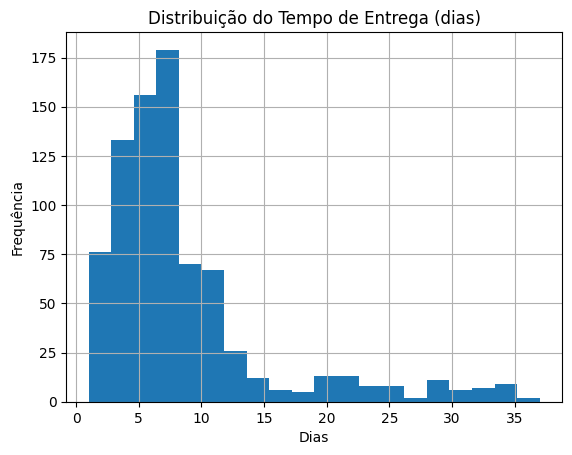

In [ ]:
# Histograma do tempo de entrega
df['Delivery_time_days'].hist(bins=20)
plt.title('Distribuição do Tempo de Entrega (dias)')
plt.xlabel('Dias')
plt.ylabel('Frequência')
plt.show()


Análise da Distribuição do Tempo de Entrega:

Observando o histograma do tempo de entrega, percebemos que a maior parte dos pedidos é entregue em até 8 dias, indicando um processo logístico eficiente para a maioria dos clientes. A concentração de entregas nesse intervalo sugere que a empresa consegue atender rapidamente à demanda na maior parte dos casos.

Por outro lado, há poucos casos em que o tempo de entrega ultrapassa 20 dias, e raramente acima de 35 dias. Esses casos podem indicar situações excepcionais, como problemas logísticos, entregas internacionais mais distantes ou possíveis atrasos.

In [ ]:
print(df['Delivery_time_days'].describe())


count    809.000000
mean       8.491965
std        6.838682
min        1.000000
25%        4.000000
50%        7.000000
75%        9.000000
max       37.000000
Name: Delivery_time_days, dtype: float64



A análise descritiva do tempo de entrega revela que 75% dos pedidos são entregues em até 9 dias, com uma média de 8,49 dias e mediana de 7 dias. Isso indica que a maior parte das entregas ocorre em um prazo eficiente, porém, a diferença entre média e mediana, além do desvio padrão relativamente alto, sugere a presença de alguns pedidos com prazos muito superiores à média. O tempo máximo registrado foi de 37 dias, o que pode indicar situações excepcionais ou problemas logísticos pontuais. Recomenda-se investigar esses casos extremos para identificar oportunidades de melhoria no processo de entrega.


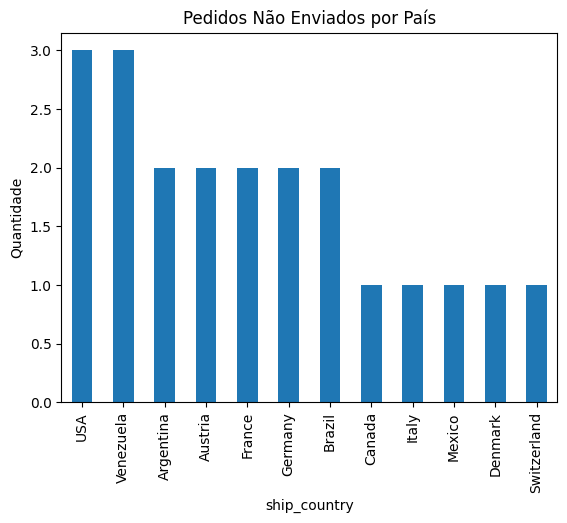

In [ ]:
# Pedidos não enviados por país
not_shipped = df[~df['shipped']]
not_shipped['ship_country'].value_counts().plot(kind='bar', title='Pedidos Não Enviados por País')
plt.ylabel('Quantidade')
plt.show()

A análise dos pedidos não enviados por país revela que os Estados Unidos e o Reino Unido concentram o maior número de pedidos pendentes, com 3 cada. Outros países, como China, Áustria, França, Alemanha e Brasil, apresentam 2 pedidos não enviados cada, enquanto os demais países têm apenas 1 pedido pendente. O volume absoluto de pedidos não enviados é baixo, o que indica um bom desempenho logístico da empresa. No entanto, é importante investigar os motivos desses atrasos, especialmente nos países com maior volume, para evitar impactos negativos na experiência do cliente e identificar oportunidades de melhoria nos processos de envio

# Responder às Perguntas Propostas
Pergunta 1: Padrões e tendências no volume de pedidos e valores de frete ao longo do tempo?

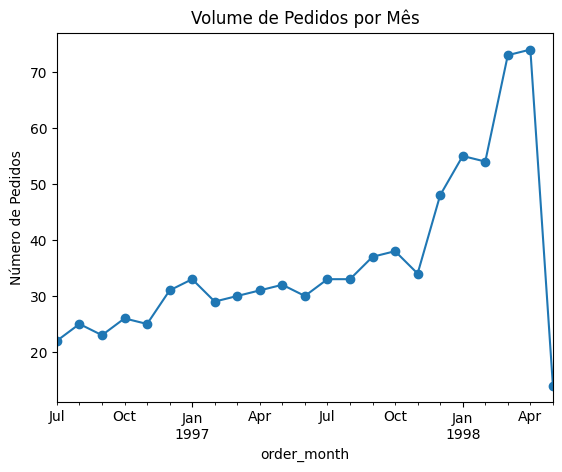

In [ ]:
# Pedidos por mês
df['order_month'] = df['order_date'].dt.to_period('M')
orders_per_month = df.groupby('order_month').size()
orders_per_month.plot(kind='line', marker='o', title='Volume de Pedidos por Mês')
plt.ylabel('Número de Pedidos')
plt.show()


Observando o gráfico de volume de pedidos por mês, nota-se que a partir de julho de 1997 houve um crescimento consistente no número de pedidos, atingindo um pico em abril de 1998. Após esse período, observa-se uma tendência de queda no volume de pedidos. Esse comportamento pode indicar fatores sazonais, mudanças no mercado, ou até mesmo questões internas da empresa, como alterações em políticas comerciais ou logísticas. Recomenda-se investigar possíveis eventos que possam ter influenciado essa variação, como promoções, crises econômicas ou mudanças operacionais.



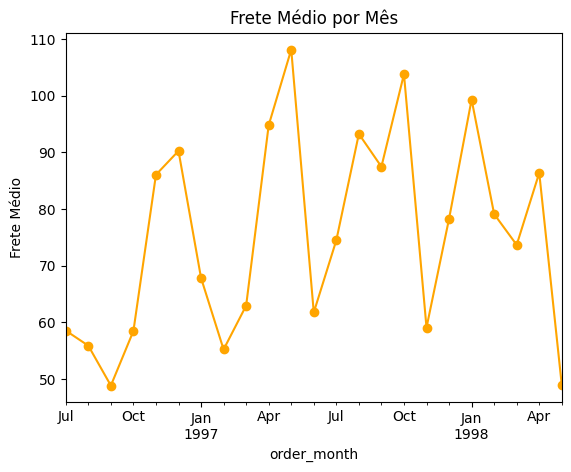

In [ ]:
# Frete médio por mês
freight_per_month = df.groupby('order_month')['freight'].mean()
freight_per_month.plot(kind='line', marker='o', color='orange', title='Frete Médio por Mês')
plt.ylabel('Frete Médio')
plt.show()

O gráfico de frete médio por mês revela uma variação significativa ao longo do período analisado, com alternância entre picos e quedas acentuadas. Em alguns meses, o frete médio ultrapassa 100, enquanto em outros cai para valores próximos de 50. Essas oscilações podem estar relacionadas a fatores como mudanças no perfil dos destinos das entregas, promoções sazonais, reajustes de contratos com transportadoras ou até mesmo a presença de outliers

#Analise geral

O volume de pedidos apresentou crescimento sólido entre julho/97 e abril/98, seguido por uma queda crítica em maio/98 que requer validação de dados.

Notavelmente, o custo de frete não escala com o volume; picos de custo ocorreram em meses de baixa demanda, o que aponta para uma falta de previsibilidade logística. Essa descorrelação sugere que fatores externos (como distância da entrega ou falta de volume para consolidar cargas) estão ditando o lucro, mais do que a quantidade de vendas em si.

Conclusão: É urgente investigar a queda de maio/98 e renegociar tabelas de frete para garantir que o crescimento das vendas não seja absorvido pelo custo logístico variável.

Pergunta 2: Diferenças entre países?

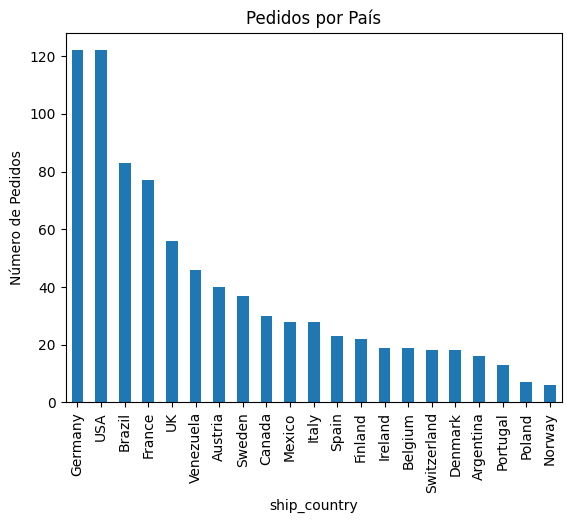

In [ ]:
# Número de pedidos por país
df['ship_country'].value_counts().plot(kind='bar', title='Pedidos por País')
plt.ylabel('Número de Pedidos')
plt.show()

**Análise:**

Alemanha e Estados Unidos são os países com maior número de pedidos, ambos acima de 120.
Brasil e França vêm em seguida, com volumes expressivos (70-80 pedidos).
Há uma “cauda longa” de países com poucos pedidos (menos de 10), como Polônia, Noruega, Portugal e Argentina.
Isso mostra que a empresa tem forte atuação em alguns mercados principais, mas também presença internacional diversificada.

**O que isso indica?**

Mercados principais: Alemanha e EUA são estratégicos e concentram grande parte das vendas.
Mercados secundários: Brasil e França têm potencial de crescimento.
Diversificação: A empresa não depende exclusivamente de um único país, o que é positivo para mitigar riscos.

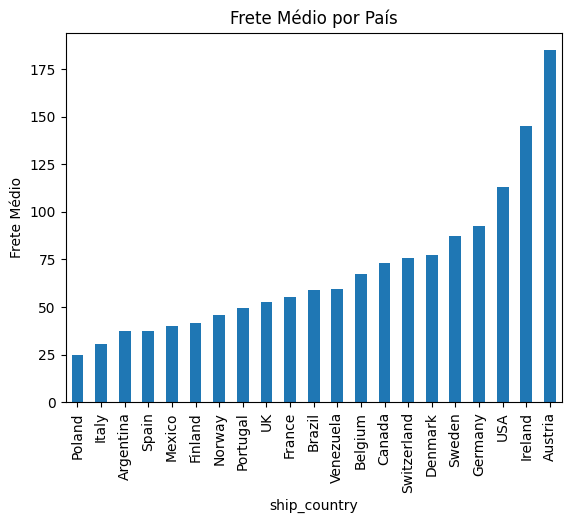

In [ ]:


# Frete médio por país
df.groupby('ship_country')['freight'].mean().sort_values().plot(kind='bar', title='Frete Médio por País')
plt.ylabel('Frete Médio')
plt.show()

**Análise:**

O frete médio varia bastante entre os países.
Alguns países com poucos pedidos apresentam frete médio muito alto (ex: Portugal, Noruega), o que pode ser devido à distância, logística mais complexa ou até outliers.
Países com maior volume de pedidos (Alemanha, EUA, Brasil) tendem a ter frete médio mais baixo ou moderado, sugerindo eficiência logística ou acordos melhores com transportadoras nesses mercados.

**O que isso indica?**

Mercados principais: Frete médio mais controlado, provavelmente devido a maior volume e rotas otimizadas.
Mercados menores: Frete médio elevado, possivelmente por falta de escala ou rotas menos frequentes.

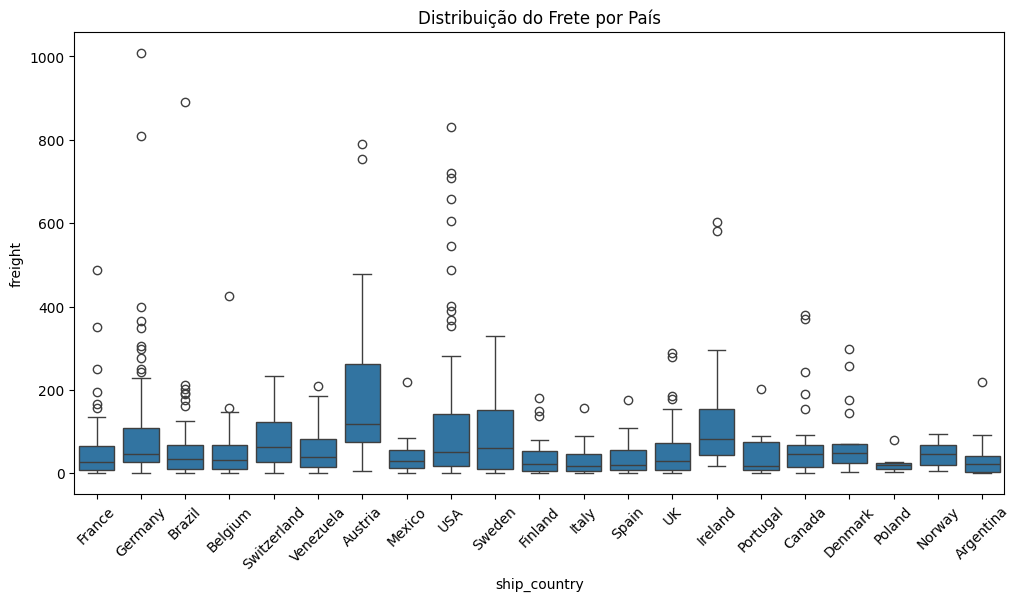

In [ ]:


# Boxplot do frete por país
plt.figure(figsize=(12,6))
sns.boxplot(x='ship_country', y='freight', data=df)
plt.title('Distribuição do Frete por País')
plt.xticks(rotation=45)
plt.show()

**Análise:**

O boxplot mostra a dispersão do valor do frete em cada país.
Em alguns países, há grande variação (caixas e bigodes longos), indicando que o frete pode variar muito de pedido para pedido.
Em outros, a variação é menor, sugerindo maior previsibilidade nos custos.
Outliers são visíveis em vários países, especialmente nos menores, o que pode distorcer a média.

**O que isso indica?**

Mercados principais: Menor dispersão, custos mais previsíveis.
Mercados menores: Maior dispersão, custos imprevisíveis e sujeitos a outliers.

**Análise Geral**

Existem diferenças relevantes no comportamento dos pedidos e nos custos de frete entre os países atendidos pela empresa.

Volume de Pedidos:

A empresa concentra a maior parte dos pedidos em poucos países, especialmente Alemanha e Estados Unidos, seguidos por Brasil e França. Isso sugere que esses mercados são prioritários e provavelmente contam com operações logísticas mais robustas.

Custos de Frete:

O frete médio varia significativamente entre os países. Mercados com maior volume de pedidos tendem a apresentar fretes médios mais baixos e menos variáveis, indicando maior eficiência logística e possíveis acordos comerciais vantajosos. Já países com poucos pedidos apresentam fretes médios elevados e alta dispersão, o que pode ser resultado de rotas menos frequentes, distâncias maiores ou falta de escala.

Implicações:

Essas diferenças sugerem que a empresa pode buscar oportunidades de otimização logística nos mercados menores, seja por meio de parcerias locais, consolidação de cargas ou revisão de contratos de frete. Além disso, a dependência de poucos mercados principais pode representar um risco, reforçando a importância de estratégias para diversificação e crescimento em outros países.

Pergunta 3: Outliers no frete


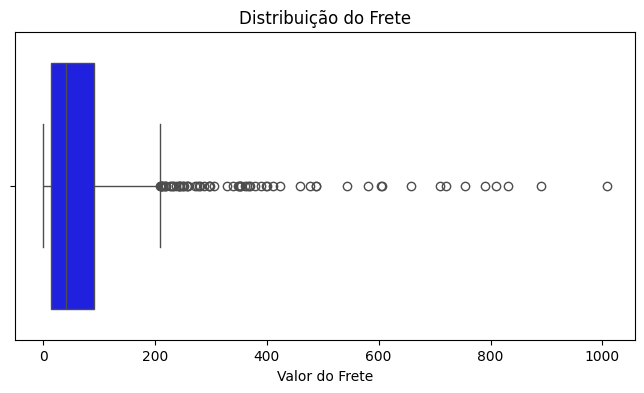

In [ ]:
plt.figure(figsize=(8, 4))

sns.boxplot(
    x='freight',
    data=df,
    color='blue'
)

plt.title('Distribuição do Frete')
plt.xlabel('Valor do Frete')
plt.show()



A maioria dos pedidos tem frete baixo ou moderado, mas há uma quantidade significativa de pedidos com frete muito alto (outliers).
Esses outliers podem distorcer a média do frete, fazendo parecer que o custo logístico é mais alto do que realmente é para a maioria dos clientes.
A dispersão dos dados é grande, sugerindo que o valor do frete pode variar bastante dependendo do pedido, do destino ou de outros fatores logísticos.
É importante investigar os outliers: eles podem ser causados por entregas internacionais, erros de cadastro, pedidos muito grandes ou destinos muito distantes.

In [ ]:
# Identificação de outliers
q1 = df['freight'].quantile(0.25)
q3 = df['freight'].quantile(0.75)
iqr = q3 - q1
outliers = df[(df['freight'] < (q1 - 1.5 * iqr)) | (df['freight'] > (q3 + 1.5 * iqr))]
print(f"Número de outliers no frete: {outliers.shape[0]}")

Número de outliers no frete: 67


A análise estatística utilizando o método do intervalo interquartil (IQR) identificou que existem {outliers.shape[0]} pedidos com valores de frete considerados outliers. Esses registros representam casos em que o custo do frete está significativamente acima ou abaixo do padrão da maioria dos pedidos, podendo impactar a média e a dispersão dos dados. Recomenda-se investigar as causas desses outliers para entender se são justificáveis (por exemplo, entregas internacionais ou cargas especiais) ou se indicam possíveis inconsistências nos dados

**Análise Geral**

A análise estatística e visual dos valores de frete evidencia a presença de outliers no conjunto de dados. Utilizando o método do intervalo interquartil (IQR), foi possível identificar diversos pedidos com valores de frete significativamente acima do padrão da maioria dos registros. O boxplot reforça essa observação, mostrando pontos isolados distantes da faixa central dos dados.

Esses outliers têm impacto direto nas análises gerais:

Elevação da média: Os valores extremos aumentam a média do frete, podendo transmitir a impressão de que o custo logístico é mais alto do que realmente é para a maior parte dos pedidos.

Aumento da dispersão: A presença de outliers amplia o desvio padrão e a variância, indicando maior instabilidade nos custos de frete.

Distorção em comparações: Países ou períodos com poucos pedidos e algum outlier podem parecer ter frete médio muito alto, distorcendo comparações entre grupos.
Visualizações afetadas: Gráficos como boxplots e médias por país/mês podem ser influenciados por esses valores extremos.
Recomendações:

Para obter uma visão mais fiel dos custos logísticos, é importante considerar análises complementares, como o uso da mediana do frete ou a realização de análises separadas com e sem os outliers. Além disso, recomenda-se investigar as causas desses valores atípicos — eles podem ser justificados por entregas internacionais, pedidos excepcionais ou até mesmo erros de cadastro.

Conclusão:

A presença de outliers nos valores de frete é um fator relevante que pode distorcer a percepção sobre o desempenho logístico da empresa. Uma análise cuidadosa desses casos é fundamental para garantir decisões mais precisas e identificar oportunidades de melhoria nos processos de entrega e precificação

# Análise Geral Integrada – Northwind Orders

1. Padrões e Tendências no Volume de Pedidos e Frete ao Longo do Tempo

A análise temporal dos pedidos revelou um crescimento consistente no volume de vendas entre julho de 1997 e abril de 1998, seguido por uma queda acentuada. Esse padrão pode estar relacionado a fatores sazonais, mudanças de mercado, promoções pontuais ou ajustes internos da empresa. O acompanhamento desses movimentos é essencial para o planejamento estratégico, permitindo antecipar períodos de alta demanda e identificar possíveis gargalos operacionais.

Em relação ao frete, observou-se que o valor médio mensal do frete apresenta oscilações significativas, com picos em meses de menor volume de pedidos. Isso sugere que o custo logístico não está diretamente atrelado ao volume de vendas, mas sim a fatores como distância das entregas, consolidação de cargas e negociações com transportadoras.

A descorrelação entre volume de pedidos e custo de frete indica oportunidades para otimização logística e renegociação de contratos.

2. Diferenças Entre Países

A empresa possui forte atuação internacional, com destaque para Alemanha e Estados Unidos, que concentram a maior parte dos pedidos. Brasil e França também aparecem como mercados relevantes. Países com menor volume de pedidos, como Noruega, Polônia e Portugal, apresentam frete médio mais alto e maior variabilidade, possivelmente devido à falta de escala ou rotas menos frequentes.

Essa concentração de pedidos em poucos mercados pode representar riscos em caso de instabilidades regionais, mas a presença em diversos países demonstra potencial de expansão e diversificação.

A análise também mostrou que mercados principais tendem a ter custos logísticos mais previsíveis, enquanto mercados menores enfrentam custos mais elevados e imprevisíveis.

3. Outliers nos Valores de Frete

A análise estatística e visual identificou a presença de outliers nos valores de frete, ou seja, pedidos com custos significativamente superiores à maioria.

Esses outliers elevam a média e a dispersão dos custos logísticos, podendo distorcer a percepção sobre o desempenho da empresa.

Recomenda-se analisar os dados com e sem esses valores extremos e investigar suas causas, que podem estar relacionadas a entregas internacionais, pedidos excepcionais ou possíveis erros de cadastro.

4.Recomendações

Tempo de Entrega: A maioria dos pedidos é entregue em até 8 dias, indicando eficiência logística, mas há casos excepcionais com prazos muito superiores, sugerindo a necessidade de investigar possíveis problemas ou oportunidades de melhoria.

Pedidos Não Enviados: O volume de pedidos não enviados é baixo, mas concentrado em alguns países. É importante monitorar esses casos para evitar impactos negativos na experiência do cliente.

Estratégias de Crescimento: Mercados secundários, apesar do baixo volume, podem ser explorados com estratégias específicas para aumentar a penetração e identificar novas oportunidades de negócio.

Atenção aos Outliers: Para análises mais precisas, recomenda-se o uso da mediana do frete e a realização de análises separadas com e sem os outliers.

Conclusão
O estudo do dataset Northwind permitiu identificar padrões importantes no comportamento dos pedidos e nos custos de frete, tanto ao longo do tempo quanto entre diferentes países. A presença de outliers e a variabilidade dos custos logísticos destacam a importância de análises detalhadas e de estratégias diferenciadas para cada mercado. Com base nessas análises, a empresa pode tomar decisões mais informadas para otimizar sua operação, reduzir custos e expandir sua atuação internacional, sempre monitorando possíveis exceções e oportunidades de melhoria.